In [88]:
#Run all this first
# Libraries
import requests
import pycurl
import os
import json
import re
import pandas as pd
from tqdm import tqdm
import sqlalchemy as db
#SQL Server [rename it as you need]
db_server = 'postgresql'
user = 'postgres'
password = 'admin'
ip = 'localhost'
db_name = 'fazenda'
# create the engine
engine = db.create_engine(f'{db_server}://{user}:{password}@{ip}/{db_name}')
#Type filter (will use it later)
types_df = ['int64', 'float64', "object", 'int64', "object", 'float64', "object", 'int64', 'int64', 'float64', "object", 'int64', 'int64', 'int64', 'int64', "object", "object", "object", "object", 'int64', "object", "object", "object", 'int64', "object", "object", "object", 'float64', 'int64', "object", 'float64', 'int64', "object", 'float64', "object", 'float64', 'int64', 'int64', "object", 'float64', "object", "object", "object",'int64', 'int64'] 

In [143]:
conn = engine.connect()
df = pd.read_sql('saude2', con = conn)

In [144]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
# prophet model 
from fbprophet import Prophet
# prophet preformance
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# don't do this 
warnings.filterwarnings('ignore')
# "high resolution"
%config InlineBackend.figure_format = 'retina'

In [145]:
from IPython.display import display
pd.options.display.max_columns = None
display(df)

,numReserva,valPagoRestos,txtDescricaoFonteRecurso,codPrograma,codSubElemento,valPagoExercicio,codEmpresa,codCategoria,mesEmpenho,numContrato,codItemDespesa,codProcesso,codModalidade,codEmpenho,codProjetoAtividade,codFonteRecurso,txtDescricaoPrograma,txtCategoriaEconomica,txtModalidadeAplicacao,codElemento,txtDescricaoSubFuncao,nomEmpresa,txtDescricaoSubElemento,codSubFuncao,txtDescricaoElemento,txtDescricaoUnidade,txtDescricaoFuncao,valLiquidado,codOrgao,txtDescricaoProjetoAtividade,valEmpenhadoLiquido,codFuncao,numCpfCnpj,valTotalEmpenhado,datEmpenho,anoContrato,anoEmpenho,codUnidade,txtDescricaoOrgao,valAnuladoEmpenho,txtGrupoDespesa,txtRazaoSocial,txtDescricaoItemDespesa,codGrupo,pagina
0,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,11,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Privadas sem Fin...,39,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,301,Serviços de Assistência à Saúde,Fundo Municipal de Saúde,Saúde,1745393.89,84,Manutenção e Operação para Atendimento Ambulat...,1745393.89,10,55401178000136,1745393.89,27/02/2018,2011.0,2018,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,FUNDAÇÃO INSTITUTO DE PESQUISA E ESTUDO DE DIA...,Outras Despesas - Art. 38 da Lei Municipal 16....,3,92
1,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,12,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Privadas sem Fin...,39,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,301,Serviços de Assistência à Saúde,Fundo Municipal de Saúde,Saúde,1745393.89,84,Manutenção e Operação para Atendimento Ambulat...,1745393.89,10,55401178000136,1745393.89,27/02/2018,2011.0,2018,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,FUNDAÇÃO INSTITUTO DE PESQUISA E ESTUDO DE DIA...,Outras Despesas - Art. 38 da Lei Municipal 16....,3,92
2,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,1,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,0.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63
3,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,2,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,0.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63
4,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,3,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,840.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543051,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,6,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Privadas sem Fin...,39,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAU

In [115]:
#new = df.loc[df['mesEmpenho'] == 12]

In [148]:
from datetime import datetime

df['datnovo'] = df['datEmpenho'].apply(pd.to_datetime, '%d/%m/%Y') 

In [150]:
display(df.iloc[30])

numReserva                                                                  15826
valPagoRestos                                                                   0
txtDescricaoFonteRecurso                                        Tesouro Municipal
codPrograma                                                                  3003
codSubElemento                                                         50        
valPagoExercicio                                                      1.26399e+06
codEmpresa                                                                     01
codCategoria                                                                    3
mesEmpenho                                                                      7
numContrato                                                                   797
codItemDespesa                                                         30        
codProcesso                                                          200900545751
codModalidade   

In [151]:
df

,numReserva,valPagoRestos,txtDescricaoFonteRecurso,codPrograma,codSubElemento,valPagoExercicio,codEmpresa,codCategoria,mesEmpenho,numContrato,codItemDespesa,codProcesso,codModalidade,codEmpenho,codProjetoAtividade,codFonteRecurso,txtDescricaoPrograma,txtCategoriaEconomica,txtModalidadeAplicacao,codElemento,txtDescricaoSubFuncao,nomEmpresa,txtDescricaoSubElemento,codSubFuncao,txtDescricaoElemento,txtDescricaoUnidade,txtDescricaoFuncao,valLiquidado,codOrgao,txtDescricaoProjetoAtividade,valEmpenhadoLiquido,codFuncao,numCpfCnpj,valTotalEmpenhado,datEmpenho,anoContrato,anoEmpenho,codUnidade,txtDescricaoOrgao,valAnuladoEmpenho,txtGrupoDespesa,txtRazaoSocial,txtDescricaoItemDespesa,codGrupo,pagina,datnovo
0,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,11,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Privadas sem Fin...,39,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,301,Serviços de Assistência à Saúde,Fundo Municipal de Saúde,Saúde,1745393.89,84,Manutenção e Operação para Atendimento Ambulat...,1745393.89,10,55401178000136,1745393.89,27/02/2018,2011.0,2018,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,FUNDAÇÃO INSTITUTO DE PESQUISA E ESTUDO DE DIA...,Outras Despesas - Art. 38 da Lei Municipal 16....,3,92,2018-02-27
1,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,12,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Privadas sem Fin...,39,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,301,Serviços de Assistência à Saúde,Fundo Municipal de Saúde,Saúde,1745393.89,84,Manutenção e Operação para Atendimento Ambulat...,1745393.89,10,55401178000136,1745393.89,27/02/2018,2011.0,2018,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,FUNDAÇÃO INSTITUTO DE PESQUISA E ESTUDO DE DIA...,Outras Despesas - Art. 38 da Lei Municipal 16....,3,92,2018-02-27
2,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,1,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,0.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63,2020-02-20
3,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,2,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,0.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63,2020-02-20
4,15823,0.0,Tesouro Municipal,3003,99,0.00,01,3,3,NaN,10,6018201900812392,90,23381,2519,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Suporte Profilático e Terapêutico,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,303,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,840.00,84,Manutenção e Operação da Assistência Farmacêutica,840.00,10,05005873000100,840.00,20/02/2020,NaN,2020,10,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,PORTAL LTDA,Outras Decisões Judiciais,3,63,2020-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543051,15823,0.0,Tesouro Municipal,3003,50,1745393.89,01,3,6,798.0,30,200900545638,50,23845,2520,00,Ações e serviços da saúde,Despesas Correntes,Transferências a Instituições Priva

In [132]:
df['datnovo'] = pd.to_datetime(df['datnovo'],'day', 'month', 'year')

In [134]:
df['datnovo'] = pd.to_datetime(df['datnovo'], format='%d/%m/%y')

In [135]:
df

,numReserva,valPagoRestos,txtDescricaoFonteRecurso,codPrograma,codSubElemento,valPagoExercicio,codEmpresa,codCategoria,mesEmpenho,numContrato,codItemDespesa,codProcesso,codModalidade,codEmpenho,codProjetoAtividade,codFonteRecurso,txtDescricaoPrograma,txtCategoriaEconomica,txtModalidadeAplicacao,codElemento,txtDescricaoSubFuncao,nomEmpresa,txtDescricaoSubElemento,codSubFuncao,txtDescricaoElemento,txtDescricaoUnidade,txtDescricaoFuncao,y,codOrgao,txtDescricaoProjetoAtividade,valEmpenhadoLiquido,codFuncao,numCpfCnpj,valTotalEmpenhado,ds,anoContrato,anoEmpenho,codUnidade,txtDescricaoOrgao,valAnuladoEmpenho,txtGrupoDespesa,txtRazaoSocial,txtDescricaoItemDespesa,codGrupo,pagina,datEmpenho
2,11818,0.00,Transferências Federais,3003,17,79604.84,01,3,12,26446.0,99,6018201700010616,90,13544,2522,02,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,39,Vigilância Sanitária,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,304,Manut. e Conserv. de Máquinas e Equipamentos,Fundo Municipal de Saúde,Saúde,79604.84,84,Manutenção e Operação de Vigilância em Saúde,79604.84,10,05047357000149,79604.84,2019-02-14,2016.0,2020,10,Fundo Municipal de Saúde,0.00,Outras Despesas Correntes,VESTATECH EQUIPAMENTOS HOSPITALARES LTDA - EPP,Outras Máquinas e Equipamentos,3,41,2018-02-25
14,11818,7492.53,Transferências Federais,3003,17,249.75,01,3,12,26446.0,99,6018201700010616,90,60728,2522,02,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,39,Vigilância Sanitária,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Jurídica,304,Manut. e Conserv. de Máquinas e Equipamentos,Fundo Municipal de Saúde,Saúde,249.75,84,Manutenção e Operação de Vigilância em Saúde,7742.28,10,05047357000149,7742.28,2018-02-20,2016.0,2020,10,Fundo Municipal de Saúde,0.00,Outras Despesas Correntes,VESTATECH EQUIPAMENTOS HOSPITALARES LTDA - EPP,Outras Máquinas e Equipamentos,3,160,2020-02-20
26,11823,0.00,Tesouro Municipal,3003,36,1674400.00,01,3,12,2404.0,99,6018201900037500,90,17228,4107,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,30,Assistência Hospitalar e Ambulatorial,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Material de Consumo,302,Material Hospitalar,Fundo Municipal de Saúde,Saúde,1674400.00,84,Administração de Material Médico Hospitalar e...,1674400.00,10,59309302000199,1674400.00,2018-02-20,2019.0,2019,10,Fundo Municipal de Saúde,0.00,Outras Despesas Correntes,INJEX INDUSTRIAS CIRURGICAS LTDA,Diversos Materiais Hospitalares,3,55,2019-02-17
38,11824,0.00,Tesouro Municipal,3003,12,1411.92,01,3,12,6115.0,99,6018201700145082,90,19024,2522,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,30,Vigilância Sanitária,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Material de Consumo,304,Material de Coudelaria ou de Uso Zootécnico,Coordenação de Vigilância em Saúde,Saúde,1411.92,84,Manutenção e Operação de Vigilância em Saúde,1411.92,10,11991514000172,1411.92,2018-02-20,2018.0,2018,22,Fundo Municipal de Saúde,0.00,Outras Despesas Correntes,MIG COMERCIO DE MATERIAIS PARA CONSTRUCAO LTDA,Diversos Materiais para Coudelaria ou de Uso Z...,3,75,2020-02-19
50,11827,0.00,Tesouro Municipal,3003,99,427.50,01,3,12,NaN,10,6018201800646008,90,25191,4107,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,91,Assistência Hospitalar e Ambulatorial,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Sentenças Judiciais,302,Outras Sentenças Judiciais,Fundo Municipal de Saúde,Saúde,427.50,84,Administração de Material Médico Hospitalar e...,427.50,10,48791685000168,427.50,2018-02-20,NaN,2019,10,Fundo Municipal de Saúde,0.00,Outras Despesas Correntes,C.B.S. MEDICO CIENTIFICA S/A,Outras Decisões Judiciais,3,86,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968162,11811,0.00,Tesouro Municipal,3003,03,3300.00,01,3,12,NaN,02,6018201800005185,90,17755,4107,0

In [136]:
new = new.rename(columns = {'datEmpenho': 'ds', 'valLiquidado': 'y'}, inplace = False)

In [137]:
wmt = new[['ds','y']]

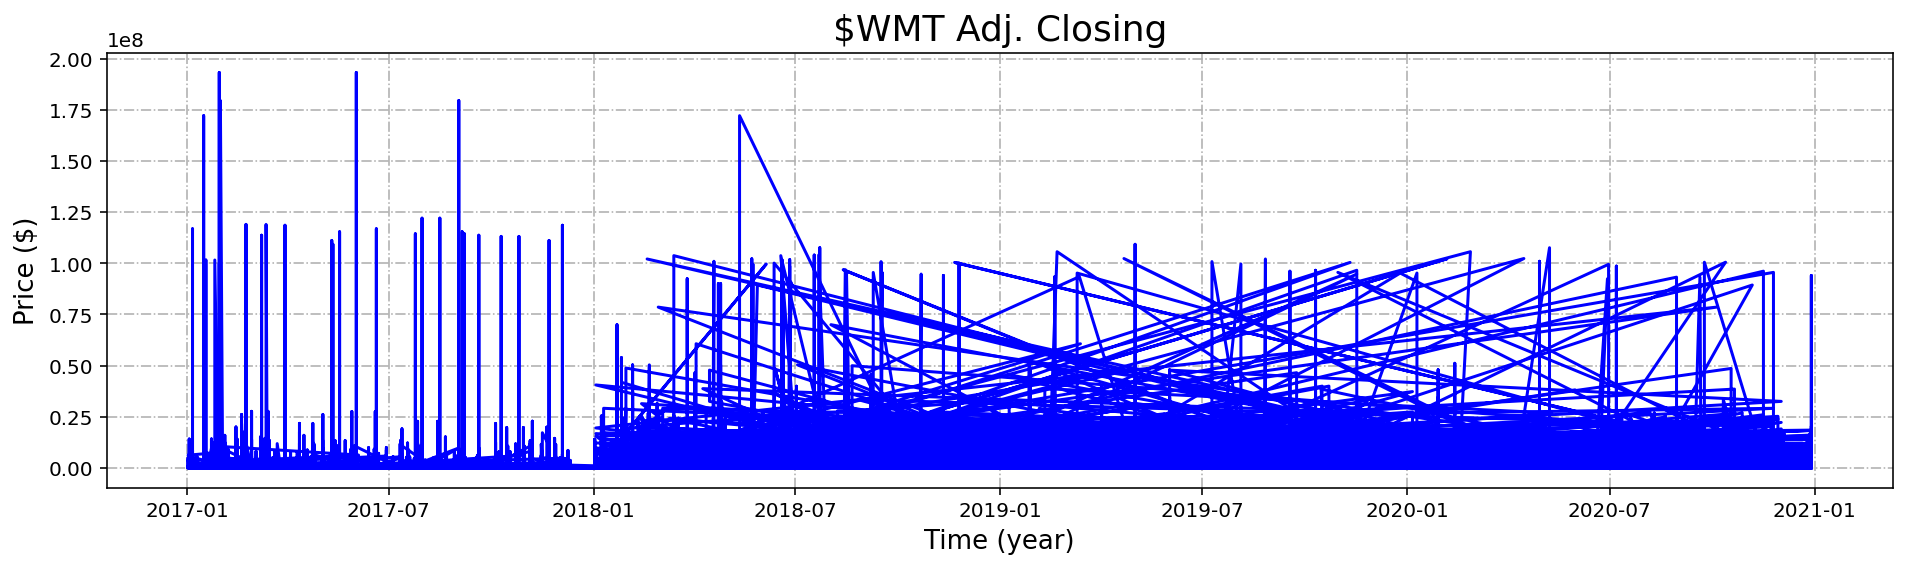

In [138]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(wmt.ds, wmt.y, 'b')

# set title & labels
plt.title('$Fundo Municipal de Saúde', fontsize=18)
plt.ylabel('Empenho (R$)', fontsize=13)
plt.xlabel('Tempo (mês)', fontsize=13)

# display graph
plt.show()

In [56]:
df2 = df.rename(columns = {'mesEmpenho': 'month', 'anoEmpenho': 'year'}, inplace = False)

In [58]:
df2['day'] = 1 

In [62]:
df2['date'] = pd.to_datetime(df2[['year','month', 'day' ,'day', 'month', 'year']])

In [66]:
df2 = df2.rename(columns = {'date': 'ds', 'valPagoExercicio': 'y'}, inplace = False)

In [77]:
df2

,numReserva,valPagoRestos,txtDescricaoFonteRecurso,codPrograma,codSubElemento,y,codEmpresa,codCategoria,month,numContrato,codItemDespesa,codProcesso,codModalidade,codEmpenho,codProjetoAtividade,codFonteRecurso,txtDescricaoPrograma,txtCategoriaEconomica,txtModalidadeAplicacao,codElemento,txtDescricaoSubFuncao,nomEmpresa,txtDescricaoSubElemento,codSubFuncao,txtDescricaoElemento,txtDescricaoUnidade,txtDescricaoFuncao,valLiquidado,codOrgao,txtDescricaoProjetoAtividade,valEmpenhadoLiquido,codFuncao,numCpfCnpj,valTotalEmpenhado,datEmpenho,anoContrato,year,codUnidade,txtDescricaoOrgao,valAnuladoEmpenho,txtGrupoDespesa,txtRazaoSocial,txtDescricaoItemDespesa,codGrupo,pagina,day,ds
0,883,3086.47,Tesouro Municipal,3003,15,12243.00,01,3,7,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,12243.00,84,Manutenção e Operação de Unidade Básica de Saú...,30761.82,10,04027018877,30761.82,26/02/2019,NaN,2019,25,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,ELDA BEGALLI,Locação de Imóveis,3,84,1,2019-07-01
1,883,3086.47,Tesouro Municipal,3003,15,15329.47,01,3,8,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,15329.47,84,Manutenção e Operação de Unidade Básica de Saú...,30761.82,10,04027018877,30761.82,26/02/2019,NaN,2019,25,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,ELDA BEGALLI,Locação de Imóveis,3,84,1,2019-08-01
2,883,3086.47,Tesouro Municipal,3003,15,18415.94,01,3,9,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,18415.94,84,Manutenção e Operação de Unidade Básica de Saú...,30761.82,10,04027018877,30761.82,26/02/2019,NaN,2019,25,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,ELDA BEGALLI,Locação de Imóveis,3,84,1,2019-09-01
3,883,3086.47,Tesouro Municipal,3003,15,21502.41,01,3,10,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,21502.41,84,Manutenção e Operação de Unidade Básica de Saú...,30761.82,10,04027018877,30761.82,26/02/2019,NaN,2019,25,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,ELDA BEGALLI,Locação de Imóveis,3,84,1,2019-10-01
4,883,3086.47,Tesouro Municipal,3003,15,24588.88,01,3,11,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,24588.88,84,Manutenção e Operação de Unidade Básica de Saú...,30761.82,10,04027018877,30761.82,26/02/2019,NaN,2019,25,Fundo Municipal de Saúde,0.0,Outras Despesas Correntes,ELDA BEGALLI,Locação de Imóveis,3,84,1,2019-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968215,883,3086.47,Tesouro Municipal,3003,15,0.00,01,3,2,NaN,01,6018201700007119,90,24450,2509,00,Ações e serviços da saúde,Despesas Correntes,Aplicações Diretas,36,Atenção Básica,PREFEITURA DO MUNICÍPIO DE SÃO PAULO,Outros Serviços de Terceiros - Pessoa Física,301,Locação de Imóveis,Coordenadoria Regional de Saúde Sudeste,Saúde,0.00,84,Manutenção e Operação

In [79]:
#df3 = df2.loc[df2['month'] == 12]

In [83]:
wmt = df2[['ds','y']]

In [84]:
wmt

,ds,y
0,2019-07-01,12243.00
1,2019-08-01,15329.47
2,2019-09-01,18415.94
3,2019-10-01,21502.41
4,2019-11-01,24588.88
...,...,...
968215,2019-02-01,0.00
968216,2019-03-01,0.00
968217,2019-04-01,2983.59
968218,2019-05-01,6070.06


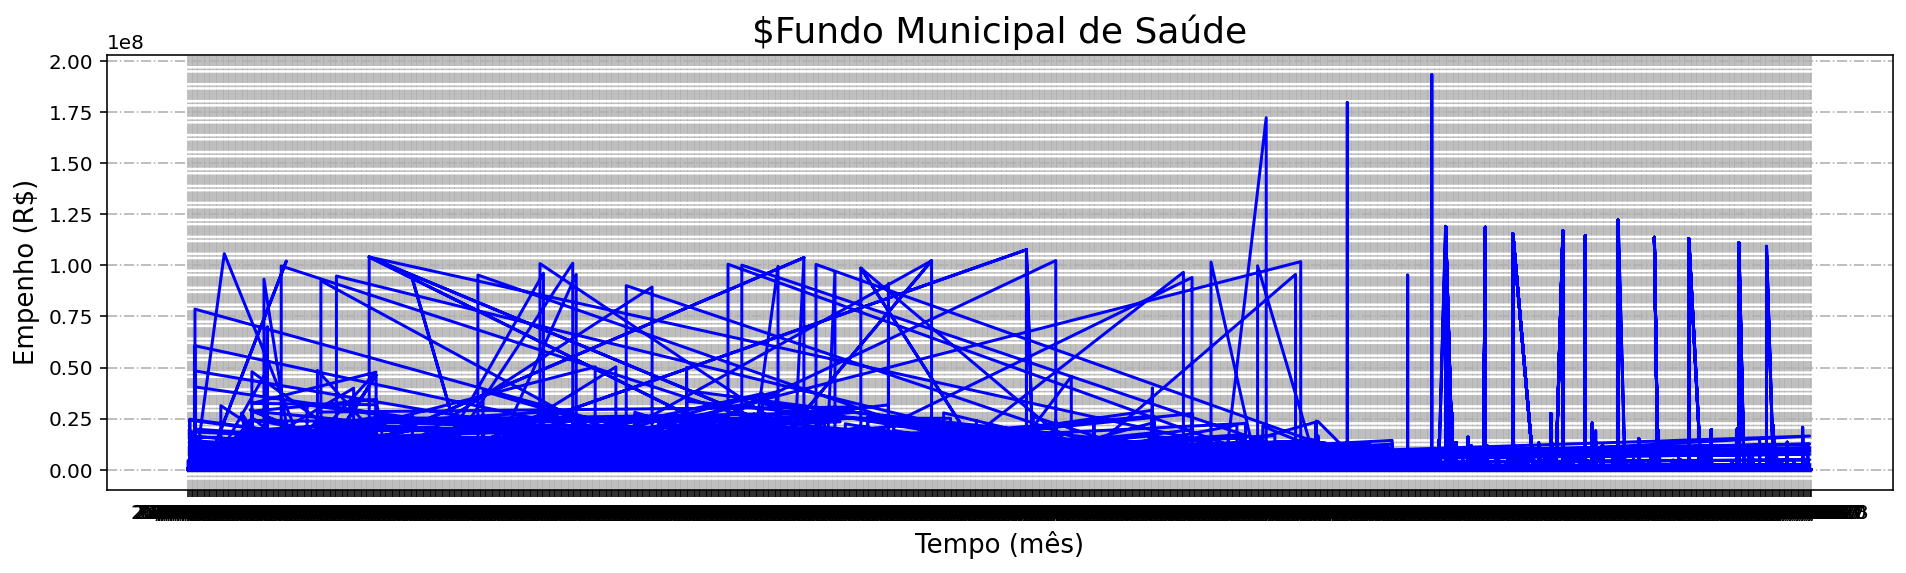

In [141]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(df2.datEmpenho, df2.valLiquidado, 'b')

# set title & labels
plt.title('$Fundo Municipal de Saúde', fontsize=18)
plt.ylabel('Empenho (R$)', fontsize=13)
plt.xlabel('Tempo (mês)', fontsize=13)

# display graph
plt.show()